In [51]:
import os
import scandir
import glob

import pandas as pd
import numpy as np

import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.lines import Line2D

import seaborn as sns

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from tqdm import tqdm

In [52]:
plotDir = 'NotebookPlots/DLC_HumanAnnotations'
if os.path.exists(plotDir) != True:
    os.mkdir(plotDir)

In [53]:
path_df = '../DATA/dlc_train_annotations/all_tips_dlc.csv'

if os.path.exists(path_df) != True:
    print(f'{path_df} does not exist!')
else:
    print(f'opening {path_df}')
    df = pd.read_csv(path_df)
df

opening ../DATA/dlc_train_annotations/all_tips_dlc.csv


,folders,animal,sex,imgs,lefteye_x,lefteye_y,righteye_x,righteye_y,mantle_tip_x,mantle_tip_y,...,r3_tip_x,r3_tip_y,r4_tip_x,r4_tip_y,l4_tip_x,l4_tip_y,l3_tip_x,l3_tip_y,l2_tip_x,l2_tip_y
0,10069_10089_fc,nur,F,img08.png,299.556403,307.456459,314.547064,302.568200,294.668144,355.361398,...,380.701504,252.382074,367.340262,306.152923,253.932651,394.793355,227.861936,333.527174,213.197159,302.242316
1,10069_10089_fc,nur,F,img12.png,302.822952,302.982191,317.908225,298.079477,312.628379,348.992273,...,388.904895,292.415536,352.219299,222.379398,251.426550,413.959733,211.776462,392.837723,193.248383,320.948777
2,10069_10089_fc,nur,F,img14.png,302.602200,301.205152,316.671582,297.368048,313.545053,346.681942,...,393.792807,290.716570,329.286686,228.600604,253.254393,418.731863,198.346891,403.101260,175.101380,315.730199
3,10141_10265_fc,sla,F,img035.png,304.648014,305.956229,298.961610,293.504967,339.060559,288.014646,...,290.621865,218.829135,374.360897,253.070602,389.616996,296.126703,377.412117,354.099879,345.882846,358.168172
4,10141_10265_fc,sla,F,img037.png,303.144783,305.280888,297.507517,292.981398,339.530776,287.344131,...,301.607347,219.953172,374.123094,284.269259,377.710445,321.423970,378.735403,352.941414,346.193000,367.803299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,slaanesh_9_3_tracking_01,sla,F,img303.png,195.751365,225.148067,205.266070,214.444024,229.845726,248.141939,...,263.940087,261.224659,233.017295,255.674414,223.502589,273.118041,196.544257,319.105784,118.282037,200.735644
2334,slaanesh_9_3_tracking_01,sla,F,img305.png,207.515406,229.669703,216.182114,219.178424,243.550669,252.020689,...,256.322661,266.617251,283.691215,271.178677,218.006685,250.196119,202.041695,327.284213,97.585046,226.020562
2335,slaanesh_9_3_tracking_01,sla,F,img320.png,207.227718,242.129643,217.226118,232.565956,243.743614,262.561157,...,213.313700,150.405189,242.439475,281.253818,201.576448,314.726723,189.839196,325.159836,141.586046,262.995870
2336,slaanesh_9_3_tracking_01,sla,F,img326.png,211.512870,251.410307,220.739808,241.763964,253.872902,266.928339,...,NaN,NaN,294.974715,264.411901,233.321996,306.771933,221.159214,353.745434,110.435962,296.286777


In [54]:
set(df['animal'])

{'kho', 'kra', 'nip', 'nur', 'sla'}

In [55]:
mex = (df['lefteye_x'] + df['righteye_x'])/2
mey = (df['lefteye_y'] + df['righteye_y'])/2

for col in df.columns[4:]:
    if 'x' in col:
        c = df[col] - mex
    elif 'y' in col:
        c = df[col] - mey
    df[col] = c

/var/folders/_h/9ln9vcxs5cnbtrz_s6b7zzf00000gn/T/ipykernel_93530/2585504123.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')
100%|██████████| 11/11 [00:16<00:00,  1.50s/it]


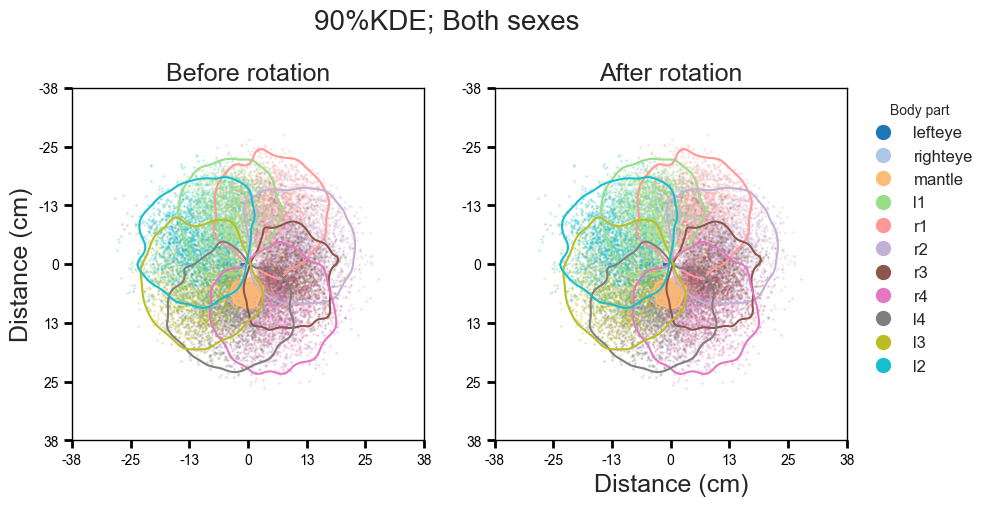

In [58]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.
    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point
    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

pthresh = .99 ## threshold for dropping DLC coordinates beneath a model confidence of .99
r = 300
nbins = 300j ## number of bins for calculating the kernel density, more equals better resolution but slower.
ss = 1 ## sub sample parameter if you want it to go faster for trouble shooting
GaussKernel = 0.3 ## Kernel size for the gaussian blur (fixed for between animal comparison)

plotKthresh = 0.9 ## Kernel density threshold. 0.9 -> 90% KDE contour, Contour contains 90% of arm tip predictions

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))

## Find the Angle between the center (0,0) of the center eyes, and the right eye
## this is the body angle, we just have to add 90 degrees to it to make it correct
bda = np.arctan2(df['righteye_x'], df['righteye_y']) ##

norm = mpl.colors.Normalize(vmin = 0, vmax = len(df.columns[4::2]))
cmap = cm.get_cmap('tab20')
m = cm.ScalarMappable(norm=norm, cmap=cmap)

legend_lines = []
legend_labels = []
for j, col in enumerate(df.columns[4::2]):
    col = col[:-2]
    c = m.to_rgba(j)
    legend_lines.append(Line2D([0], [0], color=c, marker='o', markersize=10, lw=0))
    legend_labels.append(col.split('_')[0])

pbar = tqdm(total = len(df.columns[4::2]), position=0, leave=True)
for i, col in enumerate(df.columns[4::2]):

    order = 0
    if i < 4:
        order=1

    c = m.to_rgba(i)

    x = df[col]
    y = df[col[:-2] + '_y']
    ax=ax1
    ax.scatter(x,y,color=c,s=1,alpha=0.2,zorder=order)

    g = sns.kdeplot(x=x, y=y, levels=1,
                    thresh=1-plotKthresh, color=c,
                    alpha=1, ax=ax, weights=GaussKernel, zorder=3)

    ax.set_aspect('equal')
    ax.set_xlim(-300, 300)
    ax.set_ylim(300, -300)
    ax.set_title('Before rotation', fontsize=18)
    ax.set_ylabel('Distance (cm)', fontsize=18)
    ax.set_xlabel('Distance (cm)', fontsize=18)
    ax.set_xlabel('')

    rot_xy = [rotate((0,0), (s,z), angle - np.pi/2) for s,z,angle in zip(x,y,bda)]
    xr = [s[0] for s in rot_xy]
    yr = [s[1] for s in rot_xy]

    xticks = np.array([-300, -200, -100, 0, 100, 200, 300])
    xlabs = xticks/20 * 2.54
    xlabs = [round(x) for x in xlabs]
    yticks = xticks
    ylabs = xlabs
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabs)
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabs)

    ax.grid(None)

    # Customizing spine colors and thickness
    for spine in ax.spines.values():
        spine.set_color('black')  # Set the color of the spine
        spine.set_linewidth(1)  # Set the thickness of the spine

    # Customize ticks on the x-axis and y-axis
    ax.tick_params(axis='x', which='both', direction='out', length=6, width=2, colors='black',
               grid_color='black', grid_alpha=0.5, labelsize='medium',bottom=True, top=False)
    ax.tick_params(axis='y', which='both', direction='out', length=6, width=2, colors='black', left=True, right=False)


    ax=ax2
    ax.scatter(xr,yr,color=c,s=1,alpha=0.2,zorder=order)

    g = sns.kdeplot(x=xr, y=yr, levels=1,
                    thresh=1-plotKthresh, color=c,
                    alpha=1, ax=ax, weights=GaussKernel, zorder=3)

    ax.set_aspect('equal')
    ax.set_xlim(-300, 300)
    ax.set_ylim(300, -300)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('After rotation', fontsize=18)
    ax.set_xlabel('Distance (cm)', fontsize=18)

    xticks = np.array([-300, -200, -100, 0, 100, 200, 300])
    xlabs = xticks/20 * 2.54
    xlabs = [round(x) for x in xlabs]
    yticks = xticks
    ylabs = xlabs
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabs)
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabs)

    ax.grid(None)

    # Customizing spine colors and thickness
    for spine in ax.spines.values():
        spine.set_color('black')  # Set the color of the spine
        spine.set_linewidth(1)  # Set the thickness of the spine

    # Customize ticks on the x-axis and y-axis
    ax.tick_params(axis='x', which='both', direction='out', length=6, width=2, colors='black',
               grid_color='black', grid_alpha=0.5, labelsize='medium',bottom=True, top=False)
    ax.tick_params(axis='y', which='both', direction='out', length=6, width=2, colors='black', left=True, right=False)

    df[col] = xr
    df[col[:-2] + '_y'] = yr

    pbar.update(n=1)
pbar.close()

fig.suptitle('90%KDE; Both sexes', y=.73, fontsize=20)

ax=ax2
ax.legend(legend_lines, legend_labels, loc="upper right", bbox_to_anchor = (1.4,1),
           frameon=False, fontsize=12, title='Body part')

fig_name = os.path.join(plotDir, 'show_effect_of_rotation_kdes_male_to_female.png')
fig.savefig(fig_name, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)

/var/folders/_h/9ln9vcxs5cnbtrz_s6b7zzf00000gn/T/ipykernel_93530/935391634.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')
100%|██████████| 11/11 [00:32<00:00,  2.96s/it]


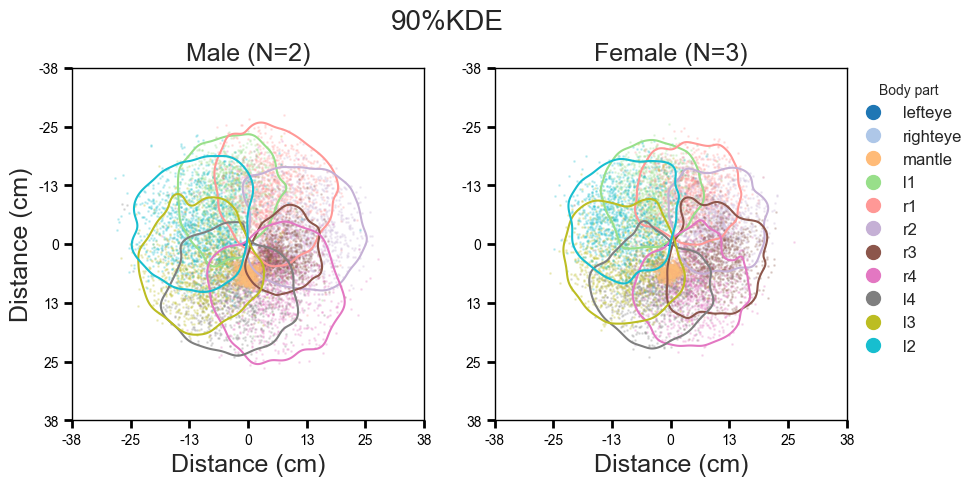

In [63]:
pthresh = .99 ## threshold for dropping DLC coordinates beneath a model confidence of .99
r = 300
nbins = 300j ## number of bins for calculating the kernel density, more equals better resolution but slower.
ss = 1 ## sub sample parameter if you want it to go faster for trouble shooting
GaussKernel = 0.3 ## Kernel size for the gaussian blur (fixed for between animal comparison)
plotKthresh = 0.9 ## Kernel density threshold. 0.9 -> 90% KDE contour, Contour contains 90% of arm tip predictions
thresh = 1-plotKthresh ## for calculating the area we take the inverse of the plot threshold

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))

norm = mpl.colors.Normalize(vmin = 0, vmax = len(df.columns[4::2]))
cmap = cm.get_cmap('tab20')
m = cm.ScalarMappable(norm=norm, cmap=cmap)

legend_lines = []
legend_labels = []
for j, col in enumerate(df.columns[4::2]):
    col = col[:-2]
    c = m.to_rgba(j)
    legend_lines.append(Line2D([0], [0], color=c, marker='o', markersize=10, lw=0))
    legend_labels.append(col.split('_')[0])

df_kde = {'sex':[], 'bodypart':[], 'kde':[], 'kde_area':[]}

pbar = tqdm(total = len(df.columns[4::2]), position=0, leave=True)
for i, col in enumerate(df.columns[4::2]):

    order = 0
    if i < 3:
        order=1

    c = m.to_rgba(i)

    dfm = df[df['sex'] == 'M']
    x = dfm[col]
    y = dfm[col[:-2] + '_y']

    if order==0:
        X, Y = np.mgrid[-r:r:nbins,
                        -r:r:nbins]
        positions = np.vstack([X.ravel(),
                               Y.ravel()])
        x_nan, y_nan = np.isnan(x).tolist(), np.isnan(y).tolist()
        x_new, y_new = [], []

        j = 0
        for xs, ys in zip(x,y):
            if x_nan[j] == False and y_nan[j] == False:
                x_new.append(xs)
                y_new.append(ys)
            j += 1
        x_new, y_new = np.array(x_new), np.array(y_new)
        values = np.vstack([x_new,y_new])
        kernel = stats.gaussian_kde(values, GaussKernel,)
        Z = np.reshape(kernel(positions).T, X.shape)
        f = np.reshape(kernel(positions).T, X.shape)
        Z = np.rot90(Z)

        Zs = (Z - Z.min())/(Z.max() - Z.min())
        Z_area = np.sum(np.where(Zs > thresh, 1, 0))

        df_kde['sex'].append('M')
        df_kde['bodypart'].append(col[:-2])
        df_kde['kde'].append(Z)
        df_kde['kde_area'].append(Z_area)

    ax=ax1
    ax.grid(None)
    ax.scatter(x,y,color=c,s=1,alpha=0.2,zorder=order)

    if order==0:
        g = sns.kdeplot(x=x, y=y, levels=1,
                        thresh=1-plotKthresh, color=c,
                        alpha=1, ax=ax, weights=GaussKernel, zorder=3)

    ax.set_aspect('equal')
    ax.set_xlim(-300, 300)
    ax.set_ylim(300, -300)
    ax.set_title('Male (N=2)', fontsize=18)
    ax.set_ylabel('Distance (cm)', fontsize=18)
    ax.set_xlabel('Distance (cm)', fontsize=18)

    dff = df[df['sex'] == 'F']
    x = dff[col]
    y = dff[col[:-2] + '_y']
    if order==0:
        X, Y = np.mgrid[-r:r:nbins,
                        -r:r:nbins]
        positions = np.vstack([X.ravel(),
                               Y.ravel()])
        x_nan, y_nan = np.isnan(x).tolist(), np.isnan(y).tolist()
        x_new, y_new = [], []

        j = 0
        for xs, ys in zip(x,y):
            if x_nan[j] == False and y_nan[j] == False:
                x_new.append(xs)
                y_new.append(ys)
            j += 1
        x_new, y_new = np.array(x_new), np.array(y_new)
        values = np.vstack([x_new,y_new])
        kernel = stats.gaussian_kde(values, GaussKernel,)
        Z = np.reshape(kernel(positions).T, X.shape)
        f = np.reshape(kernel(positions).T, X.shape)
        Z = np.rot90(Z)

        Zs = (Z - Z.min())/(Z.max() - Z.min())
        Z_area = np.sum(np.where(Zs > thresh, 1, 0))

        df_kde['sex'].append('F')
        df_kde['bodypart'].append(col[:-2])
        df_kde['kde'].append(Z)
        df_kde['kde_area'].append(Z_area)

    xticks = np.array([-300, -200, -100, 0, 100, 200, 300])
    xlabs = xticks/20 * 2.54
    xlabs = [round(x) for x in xlabs]
    yticks = xticks
    ylabs = xlabs
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabs)
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabs)
    ax.set_xlabel('Distance (cm)', fontsize=18)

    # Customizing spine colors and thickness
    for spine in ax.spines.values():
        spine.set_color('black')  # Set the color of the spine
        spine.set_linewidth(1)  # Set the thickness of the spine

    # Customize ticks on the x-axis and y-axis
    ax.tick_params(axis='x', which='both', direction='out', length=6, width=2, colors='black',
               grid_color='black', grid_alpha=0.5, labelsize='medium',bottom=True, top=False)
    ax.tick_params(axis='y', which='both', direction='out', length=6, width=2, colors='black', left=True, right=False)

    ax=ax2
    ax.grid(None)
    ax.scatter(x,y,color=c,s=1,alpha=0.2,zorder=order)

    if order==0:
        g = sns.kdeplot(x=x, y=y, levels=1,
                        thresh=1-plotKthresh, color=c,
                        alpha=1, ax=ax, weights=GaussKernel, zorder=3)

    xticks = np.array([-300, -200, -100, 0, 100, 200, 300])
    xlabs = xticks/20 * 2.54
    xlabs = [round(x) for x in xlabs]
    yticks = xticks
    ylabs = xlabs
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabs)
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabs)

    ax.set_aspect('equal')
    ax.set_xlim(-300, 300)
    ax.set_ylim(300, -300)
    ax.set_title('Female (N=3)', fontsize=18)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Customizing spine colors and thickness
    for spine in ax.spines.values():
        spine.set_color('black')  # Set the color of the spine
        spine.set_linewidth(1)  # Set the thickness of the spine

    # Customize ticks on the x-axis and y-axis
    ax.tick_params(axis='x', which='both', direction='out', length=6, width=2, colors='black',
               grid_color='black', grid_alpha=0.5, labelsize='medium',bottom=True, top=False)
    ax.tick_params(axis='y', which='both', direction='out', length=6, width=2, colors='black', left=True, right=False)

    ax.set_xlabel('Distance (cm)', fontsize=18)

    pbar.update(n=1)
pbar.close()

ax=ax2
ax.legend(legend_lines, legend_labels, loc="upper right", bbox_to_anchor = (1.37,1),
           frameon=False, fontsize=12, title='Body part')

fig.suptitle('90%KDE', y=.73, fontsize=20)

fig_name = os.path.join(plotDir, 'comparing_kdes_male_to_female.png')
fig.savefig(fig_name, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)

In [36]:
df_kde = pd.DataFrame(df_kde)

## converting to cm^2
a = np.array(df_kde['kde_area'])
a = a*(1/(20**2))
a = a*((2.54**2))
df_kde['kde_area_cm2'] = a

In [37]:
df_kde

,sex,bodypart,kde,kde_area,kde_area_cm2
0,M,l1_tip,"[[3.1977998448694486e-69, 5.44217124411757e-68...",6573,106.015917
1,F,l1_tip,"[[2.417488548404086e-125, 3.1051561113012104e-...",5674,91.515946
2,M,r1_tip,"[[4.5947537898615016e-96, 5.918563669290019e-9...",7516,121.225564
3,F,r1_tip,"[[5.413383753592391e-119, 7.373079316164866e-1...",5464,88.128856
4,M,r2_tip,"[[3.316163334500966e-150, 1.8862942804252162e-...",9109,146.919061
5,F,r2_tip,"[[2.532440804133385e-131, 1.2132481979904243e-...",5482,88.419178
6,M,r3_tip,"[[4.644384830212324e-238, 6.995485556916874e-2...",2385,38.467665
7,F,r3_tip,"[[2.3773551211264667e-110, 1.7375391766257255e...",6047,97.532063
8,M,r4_tip,"[[1.717179177315727e-69, 1.262795930217369e-68...",7571,122.112659
9,F,r4_tip,"[[2.5522189958097098e-115, 6.203227607220667e-...",5855,94.435295


/var/folders/_h/9ln9vcxs5cnbtrz_s6b7zzf00000gn/T/ipykernel_93530/3989454598.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('nipy_spectral')


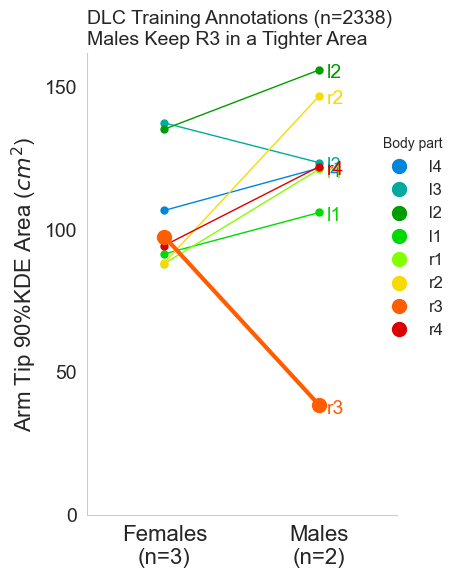

In [38]:
tips = ['l4_tip', 'l3_tip', 'l2_tip', 'l1_tip',
       'r1_tip', 'r2_tip', 'r3_tip', 'r4_tip']

fig, (ax1) = plt.subplots(1,1,figsize=(4,6))

norm = mpl.colors.Normalize(vmin = 0, vmax = len(tips)+3)
cmap = cm.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)

legend_lines = []
legend_labels = []
i = 3
for col in tips:
    col = col[:-2]
    c = m.to_rgba(i)
    legend_lines.append(Line2D([0], [0], color=c, marker='o', markersize=10, lw=0))
    legend_labels.append(col.split('_')[0])
    i += 1

ax=ax1

i = 3
for tip in tips:
    dat = df_kde[df_kde['bodypart'] == tip]

    c = m.to_rgba(i)

    areas = []
    for j, sex in enumerate(['F', 'M']):
        area = dat[dat['sex'] == sex]['kde_area_cm2'].tolist()[0]
        areas.append(area)

    lw = 1
    ms = 5
    order=0
    if 'r3' in tip:
        lw = 3
        ms = 10
        order=1
    ax.text(1.05,areas[1]-3,tip.split('_')[0], color=c, fontsize=14)
    ax.plot([0,1], areas, marker='o', markersize=ms, color=c, linewidth=lw,zorder=order)
    i += 1

ax.legend(legend_lines, legend_labels, loc="upper right", bbox_to_anchor = (1.2,.85),
           frameon=False, fontsize=12, title='Body part')
ax.set_xlim(-.5, 1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Females\n(n=3)', 'Males\n(n=2)'], fontsize=16)

ax.set_yticks([0, 50, 100, 150])
ax.set_yticklabels([0, 50, 100, 150], fontsize=14)
ax.set_ylabel('Arm Tip 90%KDE Area ($cm^2$)', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('DLC Training Annotations (n=2338)\nMales Keep R3 in a Tighter Area', loc='left', fontsize=14)

ax.grid(None)

fig_name = 'NotebookPlots/comparing_sex_areas.png'
fig.savefig(fig_name, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)

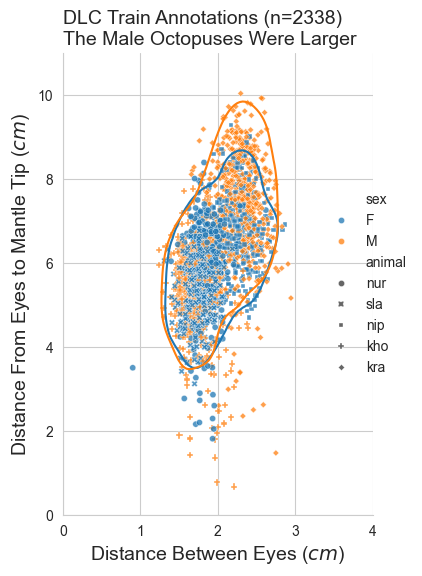

In [39]:
fig, (ax1) = plt.subplots(1,1,figsize=(4,6))

D_eyes = ((df['lefteye_x']-df['righteye_x'])**2+(df['lefteye_y']-df['righteye_y'])**2)**(1/2)
D_eyes = D_eyes/20 * 2.54 ## converting to cm
df['Distance_between_eyes_cm'] = D_eyes
D_mt = ((0-df['mantle_tip_x'])**2+(0-df['mantle_tip_y'])**2)**(1/2) ## everything is already centered
D_mt = D_mt/20 * 2.54 ## converting to cm
df['Distance_eyes_to_mantle_tip_cm'] = D_mt

ax=ax1
g0 = sns.scatterplot(y='Distance_eyes_to_mantle_tip_cm',x='Distance_between_eyes_cm',
                hue='sex', style='animal', ax=ax,data=df, s=20,alpha=.75)
g1 = sns.kdeplot(x='Distance_between_eyes_cm', y='Distance_eyes_to_mantle_tip_cm',
                hue='sex', levels=1, data=df,thresh=1-plotKthresh, color=c,
                        alpha=1, ax=ax, weights=GaussKernel, zorder=3, legend=False)

ax.set_xlim(0,4)
ax.set_ylim(0,11)
ax.set_xlabel('Distance Between Eyes ($cm$)', fontsize=14)
ax.set_ylabel('Distance From Eyes to Mantle Tip ($cm$)', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.move_legend(g0, "right",
    bbox_to_anchor=(1.15, .5), ncol=1, title=None, frameon=False,)

ax.set_title('DLC Train Annotations (n=2338)\nThe Male Octopuses Were Larger', loc='left', fontsize=14)

fig_name = 'NotebookPlots/comparing_sex_eye_and_mantle_size.png'
fig.savefig(fig_name, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)

In [40]:
for tip in tips:
    x = df[tip + '_x']
    y = df[tip + '_y']
    D = ((0-x)**2+(0-y)**2)**(1/2) ## everything is already centered of the eyes
    D = D/20 * 2.54 ## converting to cm

    df[tip+'_D_cm'] = D

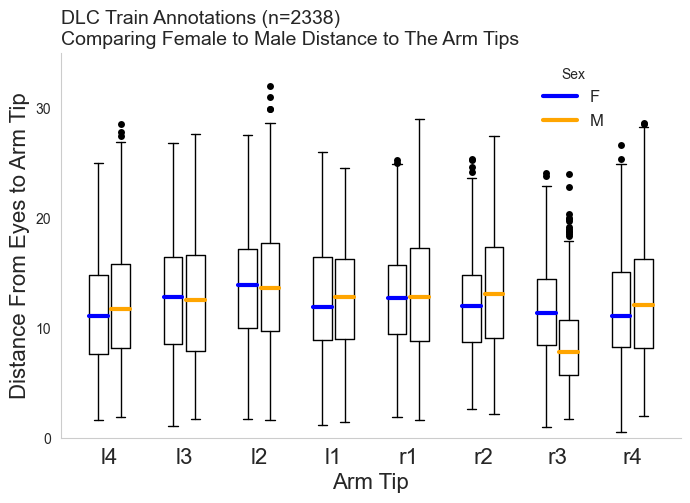

In [41]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))

pos_shift = .15
widths = [.25]
ax=ax1

xticks = []
xlabs = []
for i, tip in enumerate(tips):
    xticks.append(i)
    xlabs.append(tip.split('_')[0])
    for sex in ['F', 'M']:
        D = df[df['sex'] == sex][tip + '_D_cm']
        D = D[~np.isnan(D)]

        if sex == 'F':
            pos = [i-pos_shift]
            flierprops = dict(marker='.', markerfacecolor='black', markersize=10,
                  markeredgecolor='none')
            medianprops = dict(linestyle='-', linewidth=3, color='blue')
            boxprops = dict(linestyle='-', linewidth=1, color='black')

        elif sex == 'M':
            pos = [i+pos_shift]
            flierprops = dict(marker='.', markerfacecolor='black', markersize=10,
                  markeredgecolor='none')
            medianprops = dict(linestyle='-', linewidth=3, color='orange')
            boxprops = dict(linestyle='-', linewidth=1, color='black')

        ax.boxplot(D, positions = pos, widths=widths,
                  flierprops=flierprops,
                  medianprops=medianprops,
                  boxprops=boxprops)

ax.set_xticks(xticks)
ax.set_xticklabels(xlabs, fontsize=16)
ax.set_xlabel('Arm Tip', fontsize=16)

ax.set_ylabel('Distance From Eyes to Arm Tip', fontsize=16)

ax.set_ylim(0, 35)
ax.set_yticks([0, 10, 20, 30])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_lines = [Line2D([0], [0], color='blue', lw=3),
                Line2D([0], [0], color='orange', lw=3)]
legend_labels = ['F', 'M']

ax.legend(legend_lines, legend_labels, loc="upper right", bbox_to_anchor = (.9,1),
           frameon=False, fontsize=12, title='Sex')

ax.set_title('DLC Train Annotations (n=2338)\nComparing Female to Male Distance to The Arm Tips',
            loc='left', fontsize=14)

ax.grid(None)

fig_name = 'NotebookPlots/comparing_sex_arm_tip_distance_size.png'
fig.savefig(fig_name, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)

In [42]:
ans = []
sexes = []
armtips = []
coords = []

pbar = tqdm(total=df.shape[0], position=0, leave=True)
for row in df.values[0:]:
    an = row[1]
    sex = row[2]
    for c, col in zip(row[-8:], df.columns[-8:]):
        ans.append(an)
        sexes.append(sex)
        armtips.append(col[:6])
        coords.append(c)
    pbar.update(n=1)
pbar.close()

dat = pd.DataFrame(list(zip(ans, sexes, armtips, coords)),
                  columns = ['Animal', 'Sex', 'Arm_Tip', 'Distance_to_Arm_Tip_CM'])

100%|██████████| 2338/2338 [00:00<00:00, 106161.92it/s]


In [43]:
dat

,Animal,Sex,Arm_Tip,Distance_to_Arm_Tip_CM
0,nur,F,l4_tip,13.248401
1,nur,F,l3_tip,10.689237
2,nur,F,l2_tip,11.924721
3,nur,F,l1_tip,9.995880
4,nur,F,r1_tip,7.910842
...,...,...,...,...
18699,sla,F,l1_tip,4.444530
18700,sla,F,r1_tip,5.129706
18701,sla,F,r2_tip,8.406487
18702,sla,F,r3_tip,11.375053


In [44]:
model = ols(r'Distance_to_Arm_Tip_CM ~ C(Sex) + C(Arm_Tip) + C(Sex):C(Arm_Tip)',
            data=dat).fit()
f = sm.stats.anova_lm(model, test='F', typ=2, robust='hc3')
round(f,5)

,sum_sq,df,F,PR(>F)
C(Sex),79.10947,1.0,3.15678,0.07563
C(Arm_Tip),29413.77961,7.0,167.67526,0.00000
C(Sex):C(Arm_Tip),10004.42820,7.0,57.03092,0.00000
Residual,445820.22319,17790.0,NaN,NaN


In [45]:
model = ols(r'Distance_to_Arm_Tip_CM ~ C(Sex) + C(Arm_Tip) + C(Animal) + C(Sex):C(Arm_Tip)',
            data=dat).fit()
f = sm.stats.anova_lm(model, test='F', typ=2, robust='hc3')
round(f,5)

/Users/wlweert/opt/anaconda3/envs/hold-it-close/lib/python3.8/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Sex),4.067178e+15,1.0,1.819488e+14,0.0
C(Arm_Tip),4.091303e+17,7.0,2.614686e+15,0.0
C(Animal),1.660532e+16,4.0,1.857134e+14,0.0
C(Sex):C(Arm_Tip),9.923782e+16,7.0,6.342130e+14,0.0
Residual,3.975780e+05,17786.0,NaN,NaN


In [46]:
model = ols(r'Distance_to_Arm_Tip_CM ~ C(Arm_Tip) + C(Animal) + C(Animal):C(Arm_Tip)',
            data=dat).fit()
f = sm.stats.anova_lm(model, test='F', typ=2, robust='hc3')
round(f,5)

,sum_sq,df,F,PR(>F)
C(Arm_Tip),28530.92118,7.0,186.94294,0.0
C(Animal),55542.10531,4.0,636.87421,0.0
C(Animal):C(Arm_Tip),24787.28905,28.0,40.60339,0.0
Residual,387345.34434,17766.0,NaN,NaN


Ttest_indResult(statistic=18.27491097373964, pvalue=1.2035315783502243e-69)


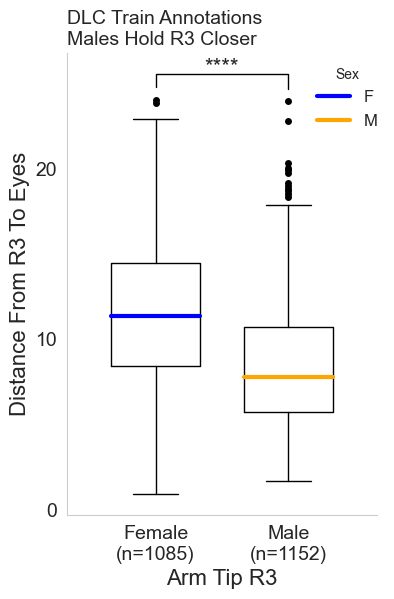

In [47]:
dat = dat[dat['Arm_Tip'] == 'r3_tip']

fig, (ax1) = plt.subplots(1,1,figsize=(4,6))

ax=ax1

F = dat[dat['Sex'] == 'F']['Distance_to_Arm_Tip_CM']
F = F[~np.isnan(F)]
M = dat[dat['Sex'] == 'M']['Distance_to_Arm_Tip_CM']
M = M[~np.isnan(M)]
out = stats.ttest_ind(F,M)
print(out)

pos = [0, .75]

flierprops = dict(marker='.', markerfacecolor='black', markersize=10,
                  markeredgecolor='none')
medianprops = dict(linestyle='-', linewidth=3, color='blue')
boxprops = dict(linestyle='-', linewidth=1, color='black')

ax.boxplot(F, positions=[pos[0]], widths=[.5],
            flierprops=flierprops,
            medianprops=medianprops,
            boxprops=boxprops)

flierprops = dict(marker='.', markerfacecolor='black', markersize=10,
                  markeredgecolor='none')
medianprops = dict(linestyle='-', linewidth=3, color='orange')
boxprops = dict(linestyle='-', linewidth=1, color='black')

ax.boxplot(M, positions=[pos[1]], widths=[.5],
           flierprops=flierprops,
           medianprops=medianprops,
           boxprops=boxprops)

ax.set_xticks(pos)
ax.set_xticklabels([f'Female\n(n={len(F)})', f'Male\n(n={len(M)})'], fontsize=14)
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels([0,10,20,30], fontsize=14)
ax.set_ylabel('Distance From R3 To Eyes', fontsize=16)
ax.set_xlabel('Arm Tip R3', fontsize=16)

xpos = [pos[0], pos[0], pos[1], pos[1]]
ysh = .75
ypos = [np.max(F)+ysh, np.max(F)+2*ysh, np.max(F)+2*ysh, np.max(M)+ysh]
ax.plot(xpos, ypos, color='black', linewidth=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## make left and bottom spines thicker and make the ticks longer and thicker


ax.legend(legend_lines, legend_labels, loc="upper right", bbox_to_anchor = (1.05,1),
           frameon=False, fontsize=12, title='Sex')

ax.text((xpos[1]+xpos[2])/2-.1, np.max(F)+2*ysh+.05, '****', fontsize=16)

ax.set_title('DLC Train Annotations\nMales Hold R3 Closer', fontsize=14, loc='left')

ax.grid(None)

fig_name = 'NotebookPlots/comparing_sex_R3_arm_tip_distance.png'
fig.savefig(fig_name, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)